In [73]:
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt
from scipy.stats import randint
import seaborn as sns
from sklearn.feature_selection import chi2, VarianceThreshold
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error, r2_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder , LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.feature_selection import RFECV
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer
# reading
data = pd.read_csv("/content/drive/MyDrive/Colab Notebook(WBS)/Machine_learning(week8&9)/mushroom competition/train_1.csv") 


In [74]:
data.shape

(6499, 8)

In [75]:
data.set_index("Id", inplace=True) 

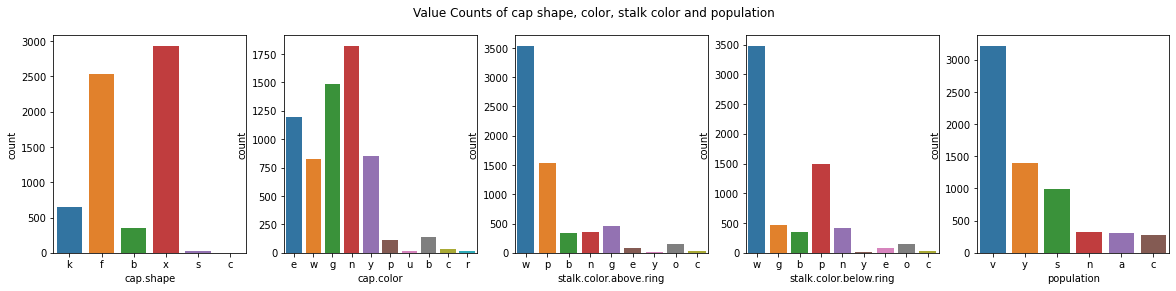

In [100]:
#histogram to see distribution of data point to see different categories
fig, ax2 = plt.subplots(1,5,  figsize=(20,4))
fig.suptitle('Value Counts of cap shape, color, stalk color and population')
sns.countplot(ax=ax2[0], x= 'cap.shape', data = data)
sns.countplot(ax=ax2[1], x='cap.color', data=data)
sns.countplot(ax=ax2[2], x='stalk.color.above.ring',data=data)
sns.countplot(ax=ax2[3], x='stalk.color.below.ring',data=data)
sns.countplot(ax=ax2[4], x='population',data=data)

plt.show()

In [76]:
# Split data features into dependent and independent
# X is Independent variables
# y is dependent variables
#drop the traget column
y=data['poisonous']
X=data.drop('poisonous',axis=1)

In [77]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state= 999999)


In [78]:
from sklearn.preprocessing import OneHotEncoder

X_cat_columns = X.select_dtypes(exclude="number").copy().columns

categoric_pipe = make_pipeline(
    OneHotEncoder(handle_unknown='ignore')
)

from sklearn.compose import ColumnTransformer

preprocessor = ColumnTransformer(
    transformers=[
        ("cat_pipe", categoric_pipe, X_cat_columns)
    ],remainder = 'passthrough'
)

In [79]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler(with_mean=False)
full_pipeline = make_pipeline(preprocessor,
                              scaler,
                              DecisionTreeClassifier())

In [ ]:
full_pipeline.fit(X_train, y_train)

In [84]:
# training accuracy
y_train_pred = full_pipeline.predict(X_train)
accuracy_score(y_train, y_train_pred)

0.959222927486055

In [85]:
y_test_pred = full_pipeline.predict(X_test)

accuracy_score(y_test, y_test_pred)  

0.9669230769230769

In [ ]:
#Grid search CV
from sklearn.model_selection import GridSearchCV

full_pipeline = make_pipeline(preprocessor, 
                              DecisionTreeClassifier())

param_grid = {
    #"columntransformer__num_pipe__simpleimputer__strategy":["mean", "median"],
    "decisiontreeclassifier__max_depth": range(2, 14, 2),
    "decisiontreeclassifier__min_samples_leaf": range(3, 12, 2)
}

search = GridSearchCV(full_pipeline,
                      param_grid,
                      cv=5,
                      scoring='recall',
                      verbose=1
                     )

search.fit(X_train, y_train)

In [88]:
search.best_params_

{'decisiontreeclassifier__max_depth': 8,
 'decisiontreeclassifier__min_samples_leaf': 3}

In [89]:
search.best_score_ 

0.9826429980276133

In [90]:
y_test_pred = search.predict(X_test)

accuracy_score(y_test, y_test_pred)

0.9476923076923077

In [ ]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_test_pred, labels=None, sample_weight=None, normalize=None)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_test_pred))

Test data

In [92]:
test_data = pd.read_csv("/content/drive/MyDrive/Colab Notebook(WBS)/Machine_learning(week8&9)/mushroom competition/test.csv")

In [93]:
test_data.set_index("Id", inplace=True)  #reset index as Id

In [94]:
result= search.predict(test_data)

In [96]:
# Two cloumns are needed to make dataframe 
result = pd.DataFrame({'Id': test_data.index,             
                       'poisonous': result})

In [97]:
result

,Id,poisonous
0,5165,1
1,4281,1
2,231,0
3,3890,0
4,1521,1
...,...,...
1620,983,1
1621,7055,0
1622,7456,1
1623,5132,0


In [98]:
# To covert dataframe to CSV
result.to_csv('mycodibles.csv', index=False)

In [99]:
# For download CSV file
from google.colab import files
files.download("mycodibles.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>